**IMDb: Highest Grossing Movies in 2022 Analysis**

**Summary**

IMDb is the world's most popular and authoritative source of movie and TV content. This content can include lists of cast and crew members, movie release dates, box office information, plot summaries, trailers, actors and other trivia, on the newest movie and TV shows.

This Data contains the details of the highest grossing movies, worldwide, in 2022 - The movie title, genre, rating and total box office amount grossed.

The aim of this analysis is to analyze the movies that made this list.
- How many movies made the list?
- What is the genre distribution?
- What is the total box office amount?
- How much did each movie gross?
- How much did each genre contribute to the total amount?
- What is the average rating for each genre?
- Is there any relationship with rating and the amount grossed?

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
box = pd.read_csv('C:/Users/USER/My Python Stuff/box.csv')

In [3]:
box.head()

,Unnamed: 0,name,genre,rating,amount
0,0,Avatar: The Way of Water,Action,7.6,"$2,320,250,281"
1,1,Top Gun: Maverick,Action,8.3,"$1,495,696,292"
2,2,Jurassic World Dominion,Action,5.6,"$1,003,775,632"
3,3,Doctor Strange in the Multiverse of Madness,Action,6.9,"$955,775,804"
4,4,Minions: The Rise of Gru,Animation,6.5,"$939,628,210"


In [4]:
#drop the first column
box = box.drop(['Unnamed: 0'], axis =1)
box

,name,genre,rating,amount
0,Avatar: The Way of Water,Action,7.6,"$2,320,250,281"
1,Top Gun: Maverick,Action,8.3,"$1,495,696,292"
2,Jurassic World Dominion,Action,5.6,"$1,003,775,632"
3,Doctor Strange in the Multiverse of Madness,Action,6.9,"$955,775,804"
4,Minions: The Rise of Gru,Animation,6.5,"$939,628,210"
...,...,...,...,...
92,Armageddon Time,Drama,6.5,"$6,538,858"
93,Crimes of the Future,Drama,5.9,"$4,551,565"
94,Vengeance,Comedy,6.8,"$4,370,536"
95,Spoiler Alert,Comedy,7.3,"$1,434,869"


- 97 movies made the list.

In [5]:
#check to ensure data types are correct and there are no missing values
box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    97 non-null     object 
 1   genre   97 non-null     object 
 2   rating  97 non-null     float64
 3   amount  97 non-null     object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


- There are no missing values.

In [6]:
#remove the dollar sign and comma from the amount column, then convert to integer
box['amount']=box['amount'].str.replace('$','')
box['amount']=box['amount'].str.replace(',','')
box['amount']=box['amount'].astype(str).apply(lambda x: int(float("".join(x.split(",")))))

C:\Users\USER\AppData\Local\Temp\ipykernel_14840\431102534.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  box['amount']=box['amount'].str.replace('$','')


In [7]:
#ensure data types are now correct
box.dtypes

name       object
genre      object
rating    float64
amount      int64
dtype: object

In [8]:
box.describe()

,rating,amount
count,97.000000,9.700000e+01
mean,6.631959,2.044960e+08
std,0.757813,3.398682e+08
min,4.600000,4.066440e+05
25%,6.200000,2.911632e+07
50%,6.600000,7.927800e+07
75%,7.100000,2.264254e+08
max,8.400000,2.320250e+09


In [9]:
#what are the genres in the 2022 highest grossing movies list
box['genre'].unique()

array(['Action', 'Animation', 'Comedy', 'Adventure', 'Biography', 'Drama',
       'Horror', 'Crime', 'Documentary', 'Thriller'], dtype=object)

In [10]:
#how many movies are in each genre?
box['genre'].value_counts()

Action         31
Drama          18
Comedy         17
Animation      14
Horror          9
Biography       4
Adventure       1
Crime           1
Documentary     1
Thriller        1
Name: genre, dtype: int64

- Out of the 97 movies that made the list, 31 of those movies are in the action genre, while Adventure, Crime, Documentary and Thriller genres have one movie each.

<AxesSubplot:title={'center':'GENRE DISTRIBUTION'}, ylabel='GENRE'>

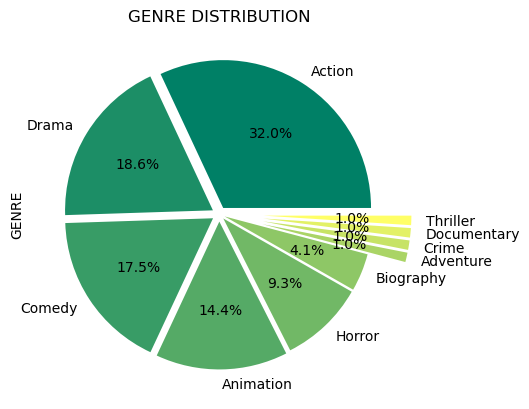

In [11]:
#Visualize the percentage distribution of each genre in the list
genre = box['genre'].value_counts().sort_values(ascending = False)
explode = (0.05,0.05,0.05,0.05,0.04,0.04,0.3,0.3,0.3,0.3)
genre.plot(kind = 'pie',cmap = 'summer',autopct='%1.1f%%',explode = explode, title = 'GENRE DISTRIBUTION', label = 'GENRE')

In [12]:
#Total amount generated from the highest grossing movies in 2022
box['amount'].sum()

19836112216

- The highest grossing movies generated the sum of $19,836,112,216 in 2022

In [13]:
#How much did each genre contribute to the total amount?
box.groupby('genre')['amount'].sum().sort_values(ascending = False)

genre
Action         11994249903
Animation       3357730754
Comedy          1695823301
Horror           938565386
Drama            821381634
Adventure        407150844
Biography        381520863
Crime            137307235
Documentary       80563999
Thriller          21818297
Name: amount, dtype: int64

<AxesSubplot:title={'center':'AMOUNT GENERATED BY GENRE'}, xlabel='genre', ylabel='Box Office Income'>

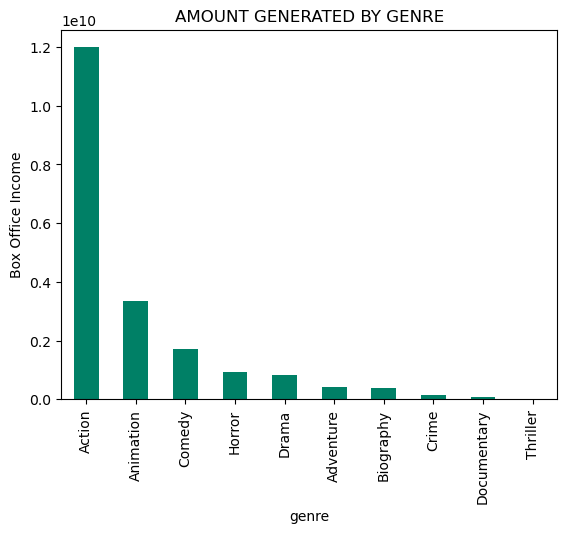

In [14]:
box.groupby('genre')['amount'].sum().sort_values(ascending = False).plot(kind = 'bar', cmap = 'summer', title = 'AMOUNT GENERATED BY GENRE',ylabel = 'Box Office Income')

<AxesSubplot:title={'center':'PERCENTAGE CONTRIBUTION BY GENRE'}, ylabel='amount'>

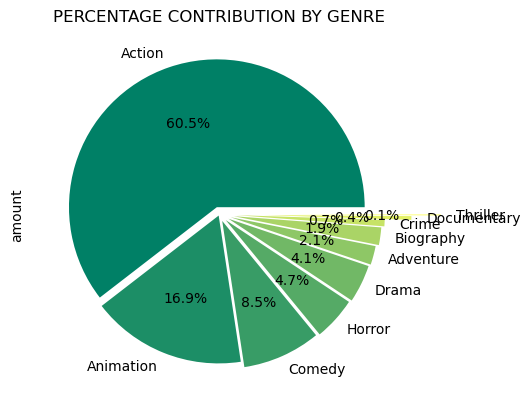

In [15]:
#Visualize the percentage contribution of each genre to the box office income in 2022
genre = box.groupby('genre')['amount'].sum().sort_values(ascending = False)
explode = (0.05,0.01,0.05,0.06,0.07,0.08,0.1,0.12,0.3,0.5)
genre.plot(kind = 'pie',cmap = 'summer',autopct='%1.1f%%',explode = explode, title = 'PERCENTAGE CONTRIBUTION BY GENRE')

- Action genre had the most numbers of movies in the 2022 highest grossing movies list, and also generated the highest income - 11 Billion USD.
- Despite Animation genre having only 14 movies in the category, it generated more income than the drama genre with 18 movies.
- Horror genre with only 9 movies, also generated more income than the drama genre.

In [16]:
#Top 10 movies by box office amount
box.sort_values(by = 'amount',ascending = False)[0:10]

,name,genre,rating,amount
0,Avatar: The Way of Water,Action,7.6,2320250281
1,Top Gun: Maverick,Action,8.3,1495696292
2,Jurassic World Dominion,Action,5.6,1003775632
3,Doctor Strange in the Multiverse of Madness,Action,6.9,955775804
4,Minions: The Rise of Gru,Animation,6.5,939628210
5,Black Panther: Wakanda Forever,Action,6.7,859208836
6,The Batman,Action,7.8,770962583
7,Thor: Love and Thunder,Action,6.2,760928081
8,Chang jin hu zhi shui men qiao,Action,5.5,626571280
9,Puss in Boots: The Last Wish,Animation,7.9,484717154


By box office amount:
- Of the 10 top movies -  8 movies are in the action genre, while 2 movies are in the animation genre.
- **Avatar: The Way of Water** was the highest grossing movie in 2022, worldwide, with a total box office income of > **2 Billion USD** 

In [17]:
#Top 10 movies by rating
box.sort_values(by = 'rating',ascending = False)[0:10]

,name,genre,rating,amount
18,The First Slam Dunk,Animation,8.4,258988390
43,K.G.F: Chapter 2,Action,8.3,89123940
1,Top Gun: Maverick,Action,8.3,1495696292
9,Puss in Boots: The Last Wish,Animation,7.9,484717154
32,RRR (Rise Roar Revolt),Action,7.8,166611197
34,Everything Everywhere All at Once,Action,7.8,141059707
16,Suzume no Tojimari,Animation,7.8,320180748
6,The Batman,Action,7.8,770962583
58,The Whale,Drama,7.7,54707839
63,The Banshees of Inisherin,Comedy,7.7,49262687


By rating:
- Of the top 10 movies in this category, 5 are in the action  genre, 3 are animation, while drama and comedy genres have one movie each.
- The highest rated movie is **The First Slam Dunk** with a rating of **8.4**.

In [18]:
box.groupby('genre')['rating'].mean().sort_values(ascending = False)

genre
Biography      6.900000
Animation      6.821429
Documentary    6.800000
Drama          6.788889
Action         6.612903
Comedy         6.564706
Thriller       6.400000
Crime          6.300000
Adventure      6.200000
Horror         6.188889
Name: rating, dtype: float64

Text(0.5, 1.0, 'AVERAGE RATING BY GENRE')

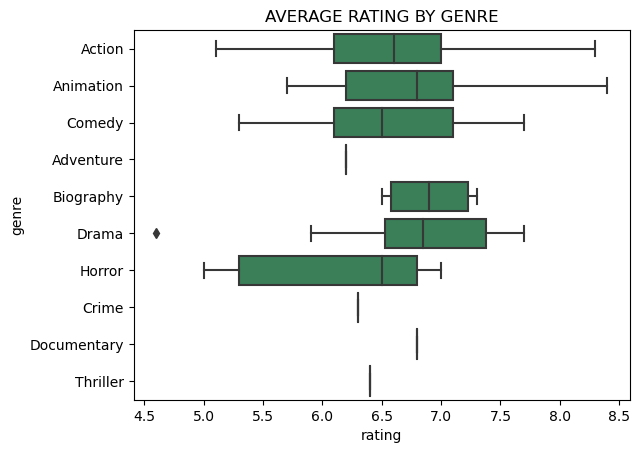

In [19]:
sns.boxplot(x = 'rating',y = 'genre',data = box, color = 'seagreen')
plt.title("AVERAGE RATING BY GENRE")

- Movies in the biography genre had the highest average rating, while those in the horror genre had the least average rating.

Text(0.5, 1.0, 'MOVIE RATINGS BY AMOUNT')

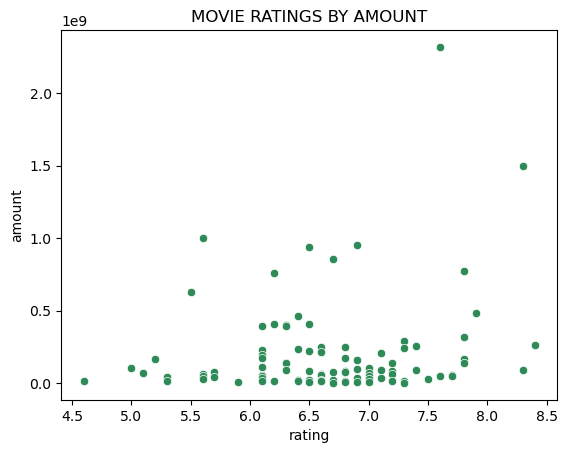

In [20]:
#Is there any relationship between rating and amount grossed?
sns.scatterplot(x = 'rating',y = 'amount',data = box, color = 'seagreen')
plt.title("MOVIE RATINGS BY AMOUNT")

From the scatterplot above, we can infer that there is no direct relationship between the movie rating and the box office amount.

**Conclusion**

- 97 movies made the list of the 2022 highest grossing movies worldwide.

- The highest grossing movies generated the sum of **$19,836,112,216** in 2022.

- There are 10 genres represented in the data: Action, Adventure, Animation, Comedy, Biography, Drama, Documentary, Crime, Horror and Thriller.

- Of the 10 genres, Action had the most number of movies on the list, and it also had the highest contribution to the total sum generated at the box office.

- The highest grossing movie, worldwide, in 2022 was **Avatar: The Way of Water**, with a total box office income of over 2 Billion USD.

- The movie with the highest rating is **The First Slam Dunk**, with an IMDb rating of 8.4.

- There is no direct relationship between the IMDb rating and the amount generated at the box office.